In [1]:
import scanpy as sc
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 设置参数
sc.settings.verbosity = 4
sc.settings.set_figure_params(
    dpi=80,
    dpi_save=300,
    facecolor="white",
    frameon=False,  # remove frame
)

 9 注释-通过预设的marker genes
- 9.1 读取聚类后的数据
- 9.1.1 从json文件导入
- 9.1.2 显式输入
- 9.2 检查基因是否在数据中
- 9.2.1 显示缺失的基因和数量
- 9.3 绘制marker genes
- 9.3.1 绘制标记基因在聚类图上
- 9.3.2 绘制标记基因在气泡图上
- 9.3.3 绘制标记基因在堆叠小提琴图上
- 9.4 肉眼手动注释
- 9.5 保存

In [71]:
## 9.1 读取聚类后的数据
adata = sc.read("anndata_cluster.h5ad")

In [72]:
## 9.1导入基因标签
# # %% 
# ## 9.1.1 从json文件导入
# import json
# with open("ann_cell.json") as f:
#     marker_genes = json.load(f)

In [73]:
## 9.1.2 显式输入
marker_genes = {
    "CD14+ Mono": ["FCN1", "CD14"],
    "CD16+ Mono": ["TCF7L2", "FCGR3A", "LYN"],
    "ID2-hi myeloid prog": [
        "CD14",
        "ID2",
        "VCAN",
        "S100A9",
        "CLEC12A",
        "KLF4",
        "PLAUR",
    ],
    "cDC1": ["CLEC9A", "CADM1"],
    "cDC2": [
        "CST3",
        "COTL1",
        "LYZ",
        "DMXL2",
        "CLEC10A",
        "FCER1A",
    ],  # Note: DMXL2 should be negative
    "Normoblast": ["SLC4A1", "SLC25A37", "HBB", "HBA2", "HBA1", "TFRC"],
    "Erythroblast": ["MKI67", "HBA1", "HBB"],
    "Proerythroblast": [
        "CDK6",
        "SYNGR1",
        "HBM",
        "GYPA",
    ],  # Note HBM and GYPA are negative markers
    "NK": ["GNLY", "NKG7", "CD247", "GRIK4", "FCER1G", "TYROBP", "KLRG1", "FCGR3A"],
    "ILC": ["ID2", "PLCG2", "GNLY", "SYNE1"],
    "Lymph prog": [
        "VPREB1",
        "MME",
        "EBF1",
        "SSBP2",
        "BACH2",
        "CD79B",
        "IGHM",
        "PAX5",
        "PRKCE",
        "DNTT",
        "IGLL1",
    ],
    "Naive CD20+ B": ["MS4A1", "IL4R", "IGHD", "FCRL1", "IGHM"],
    "B1 B": [
        "MS4A1",
        "SSPN",
        "ITGB1",
        "EPHA4",
        "COL4A4",
        "PRDM1",
        "IRF4",
        "CD38",
        "XBP1",
        "PAX5",
        "BCL11A",
        "BLK",
        "IGHD",
        "IGHM",
        "ZNF215",
    ],  # Note IGHD and IGHM are negative markers
    "Transitional B": ["MME", "CD38", "CD24", "ACSM3", "MSI2"],
    "Plasma cells": ["MZB1", "HSP90B1", "FNDC3B", "PRDM1", "IGKC", "JCHAIN"],
    "Plasmablast": ["XBP1", "RF4", "PRDM1", "PAX5"],  # Note PAX5 is a negative marker
    "CD4+ T activated": ["CD4", "IL7R", "TRBC2", "ITGB1"],
    "CD4+ T naive": ["CD4", "IL7R", "TRBC2", "CCR7"],
    "CD8+ T": ["CD8A", "CD8B", "GZMK", "GZMA", "CCL5", "GZMB", "GZMH", "GZMA"],
    "T activation": ["CD69", "CD38"],  # CD69 much better marker!
    "T naive": ["LEF1", "CCR7", "TCF7"],
    "pDC": ["GZMB", "IL3RA", "COBLL1", "TCF4"],
    "G/M prog": ["MPO", "BCL2", "KCNQ5", "CSF3R"],
    "HSC": ["NRIP1", "MECOM", "PROM1", "NKAIN2", "CD34"],
    "MK/E prog": [
        "ZNF385D",
        "ITGA2B",
        "RYR3",
        "PLCB1",
    ],  # Note PLCB1 is a negative marker
}

In [74]:
## 9.2 检查基因是否在数据中
"""注意是原始的raw还是现在的adata,此处是adata"""
marker_genes_in_data = {ct: [marker for marker in markers if marker in adata.raw.var.index] for ct, markers in marker_genes.items()}

missing_marker_genes = {ct: set(markers) - set(marker_genes_in_data[ct]) for ct, markers in marker_genes.items()}

In [75]:
## 9.2.1 显示缺失的基因和数量
# 说不定找别名就找到了呢
for ct, missing_genes in missing_marker_genes.items():
    if missing_genes:
        print(f"Markers Missing of    {ct} : {len(missing_genes)}\n{missing_genes}")

Markers Missing of    Proerythroblast : 1
{'GYPA'}
Markers Missing of    Lymph prog : 2
{'DNTT', 'VPREB1'}
Markers Missing of    Plasmablast : 1
{'RF4'}


In [76]:
## 9.3 绘制标记基因
B_plasma_cts = marker_genes_in_data.keys()

In [ ]:
## 9.3.1 绘制标记基因在聚类图上
for ct in B_plasma_cts:
    print(f"{ct.upper()}:")  # print cell subtype name
    sc.pl.umap(
        adata,
        color=["leiden_0_25"]+marker_genes_in_data[ct],
        vmin=0,
        vmax="p99",  # 这是着色的最大值，防止被极端值影响
        sort_order=False,  # 不要在顶部绘制最高表达的，以免遮掩细胞间平均表达
        frameon=False,
        ncols = 3,
        legend_loc="on data",
        cmap=None,  #着色的颜色映射
        save=f"-{ct}-9.3.1.pdf",
    )
    print("\n\n\n")  # 打印空白易读

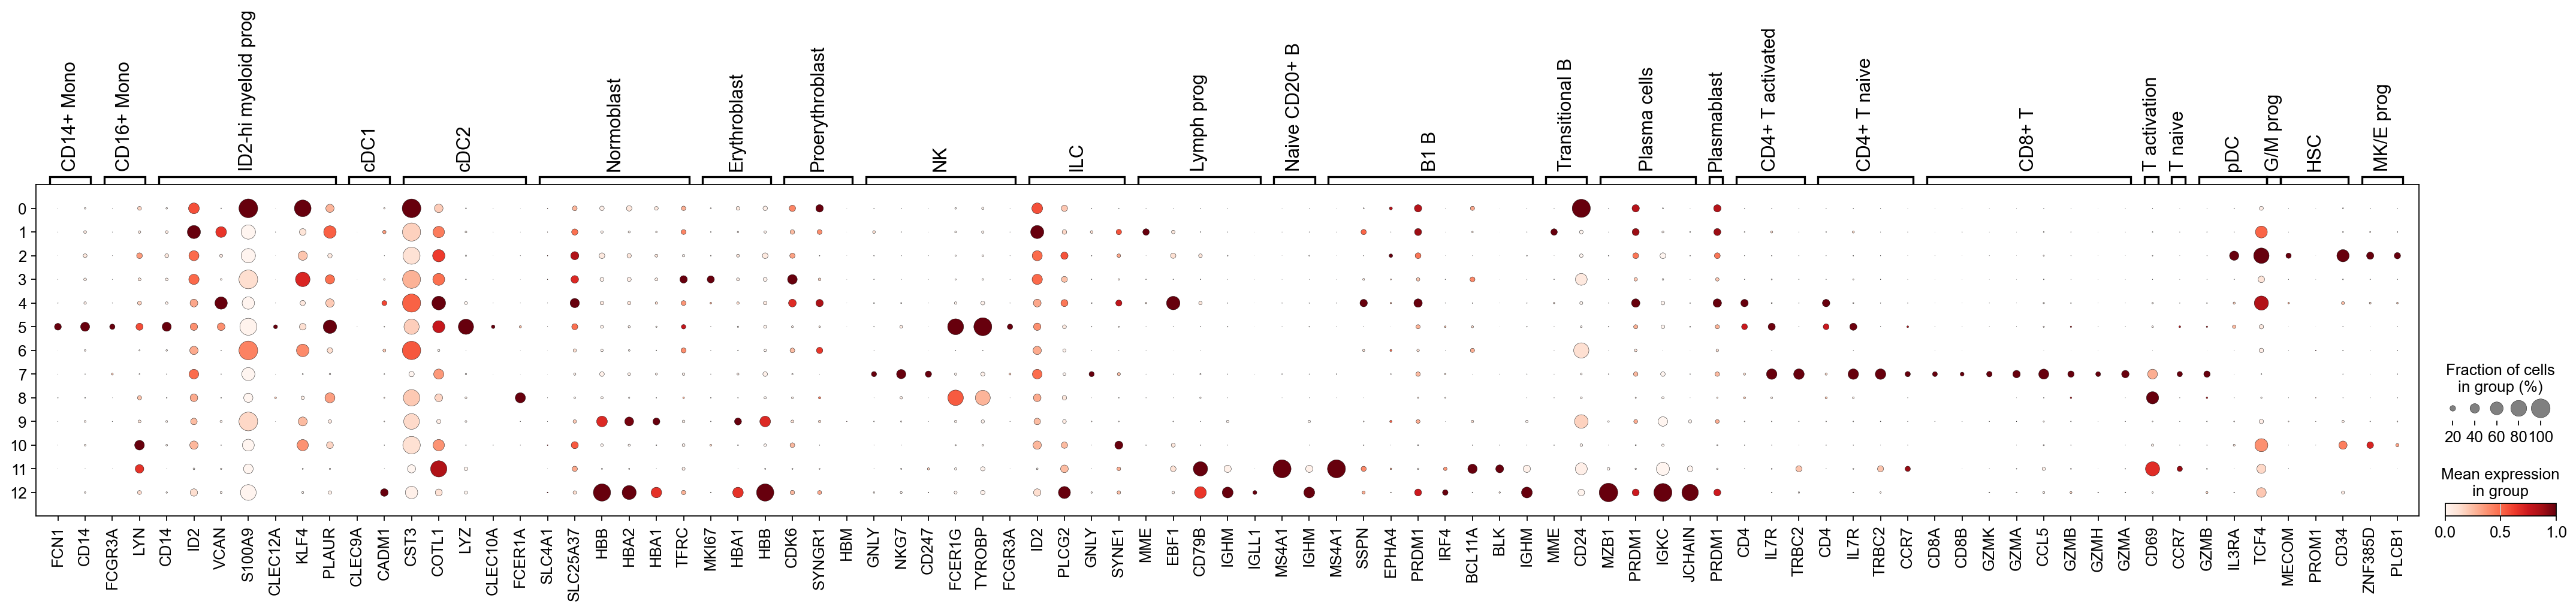

In [78]:
## 9.3.2 绘制标记基因在气泡图
B_plasma_markers = {
    ct: [m for m in ct_markers if m in adata.var.index]
    for ct, ct_markers in marker_genes.items()
    if ct in B_plasma_cts
}
sc.pl.dotplot(
    adata,
    groupby="leiden_0_25",
    var_names=B_plasma_markers,
    standard_scale="var",  # standard scale: normalize each gene to range from 0 to 1
    save="-9.3.2.pdf"
)

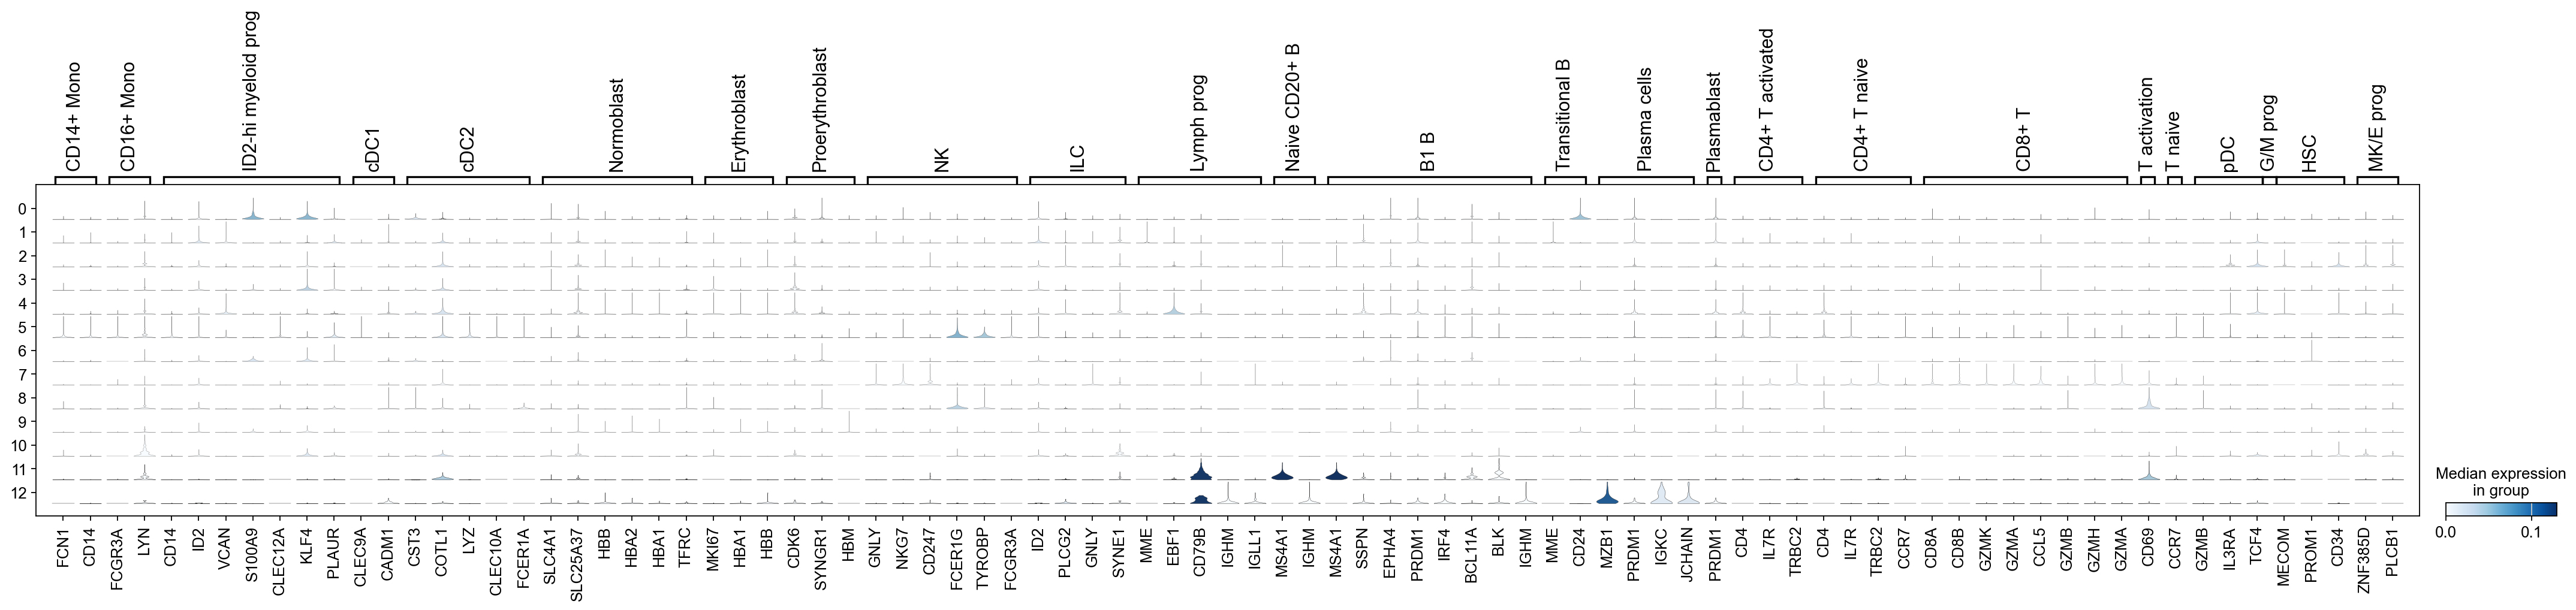

In [80]:
## 9.3.3 绘制标记基因在堆叠小提琴图
sc.pl.stacked_violin(
    adata,
    groupby=["leiden_0_25"],
    var_names=B_plasma_markers,
    standard_scale="var",  # standard scale: normalize each gene to range from 0 to 1
    rotation=90,
    save="-9.3.3.pdf"
)

In [81]:
## 9.4 肉眼看图注释
cell_anno = {
    "5": "MO NO",
    # "6": "Naive CD20+ B",
    # "8": "Transitional B",
    # "18": "B1 B",  # note that IGHD and IGHM are negative markers, in this case more lowly expressed than in the other B cell clusters
}
adata.obs["manual_celltype_annotation"] = adata.obs.leiden_0_25.map(cell_anno)

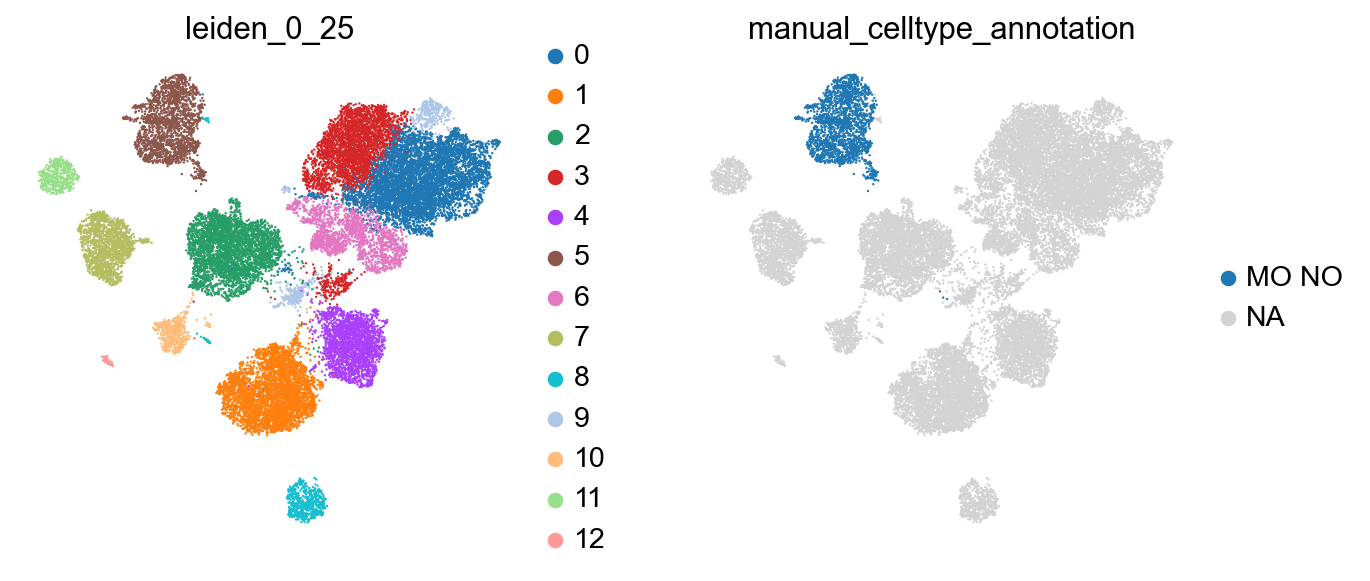

In [83]:
## 9.4.1 绘制注释后的聚类图
sc.pl.umap(
    adata, 
    color=["leiden_0_25","manual_celltype_annotation"],
    ncols = 2,
    save="-9.4.1.pdf"
)
# sc.pl.tsne(
#     adata, 
#     color=["leiden_0_25","manual_celltype_annotation"],
#     ncols = 2,
#     save="-9.4.1.pdf",
#     # 调整间距
#     frameon=True,
# )

In [84]:
## 9.5 保存
adata.write("anndata_manual_anno.h5ad", compression="gzip") # type: ignore